<a href="https://colab.research.google.com/github/wadeyman/introduction-to-tensorflow/blob/main/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf
import tensorflow_datasets.public_api as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [10]:
ds, info = tfds.load('cats_vs_dogs', split='train', shuffle_files=True, with_info=True)

In [5]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [14]:
eg = tfds.as_dataframe(ds.take(1), info)

,image,image/filename,label
0,,PetImages/Dog/5007.jpg,1 (dog)

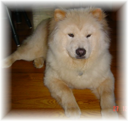

In [18]:
eg

In [30]:
image = eg.image[0] ## array of numbers as color per pixel
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

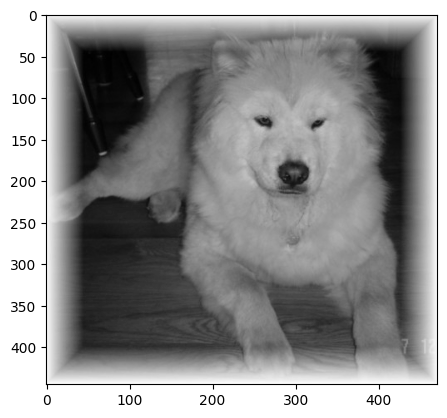

In [31]:
plt.imshow(image, cmap='gray')

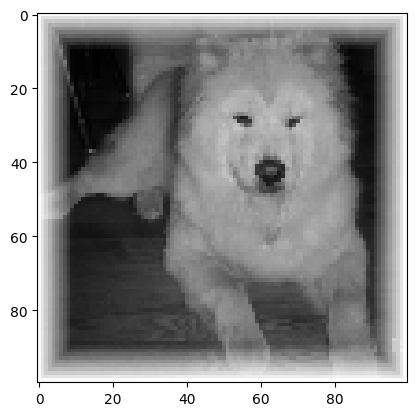

In [34]:
img_size = 100
newimg = cv2.resize(image, (img_size, img_size))
plt.imshow(newimg, cmap='gray')

In [54]:
data = tfds.as_dataframe(ds.take(6000), info)

In [55]:
data = data[['image', 'label']]
data.head(2)

,image,label
0,"[[[152, 139, 131], [190, 181, 174], [182, 177,...",1
1,"[[[106, 84, 37], [107, 85, 38], [107, 85, 38],...",0


In [56]:
data['image'] = data['image'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))


<ipython-input-56-a80638e5208c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))


In [57]:
data['image'] = data['image'].apply(lambda x: cv2.resize(x, (100, 100)))

<ipython-input-57-fc7f0c35f181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['image'] = data['image'].apply(lambda x: cv2.resize(x, (100, 100)))


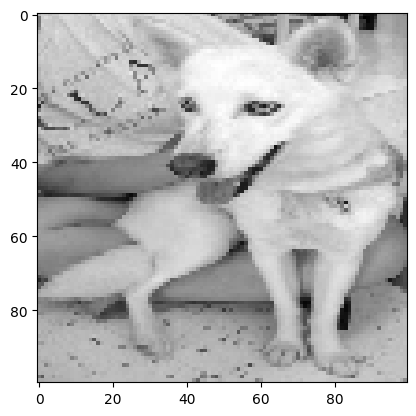

In [58]:
plt.imshow(data.image[0], cmap='gray')

In [59]:
data.label.value_counts()

0    3024
1    2976
Name: label, dtype: int64

In [74]:
# Sample 2000 examples for each label
seed = 40
sample = data.groupby('label').apply(lambda x: x.sample(n=2000, random_state=seed)).reset_index(drop=True)

In [75]:
sample.label.value_counts()

0    2000
1    2000
Name: label, dtype: int64

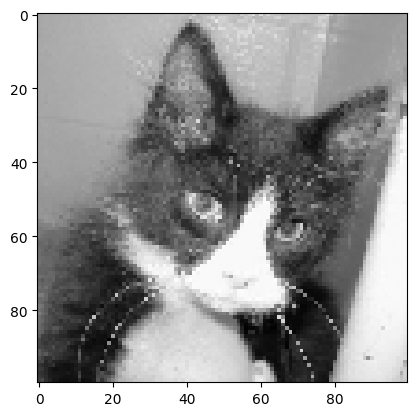

In [78]:
plt.imshow(sample.image[0], cmap='gray')

In [88]:
sample = data.sample(frac=1, random_state=seed).reset_index(drop=True)
sample

,image,label
0,"[[167, 169, 168, 174, 166, 147, 78, 70, 67, 61...",1
1,"[[77, 78, 78, 80, 85, 83, 87, 84, 87, 89, 86, ...",0
2,"[[134, 134, 134, 134, 134, 131, 120, 97, 89, 1...",0
3,"[[185, 186, 184, 186, 186, 190, 186, 189, 189,...",1
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
...,...,...
5995,"[[78, 81, 82, 87, 88, 88, 94, 91, 100, 100, 10...",1
5996,"[[200, 221, 221, 227, 233, 237, 242, 249, 249,...",0
5997,"[[74, 73, 73, 76, 76, 74, 72, 73, 76, 77, 75, ...",1
5998,"[[74, 74, 50, 70, 79, 88, 97, 112, 86, 41, 55,...",0


In [90]:
x,y = [],[]

for index, row in shuffled_data.iterrows():
    image = row['image']
    label = row['label']
    x.append(image)
    y.append(label)


In [93]:
x = np.array(x).reshape(-1, img_size, img_size, 1)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

x = x/255.0 # normalizing

In [106]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

model.fit(np.array(x), np.array(y), epochs = 2, validation_split=0.1)

Epoch 1/2
169/169 [==============================] - 134s 791ms/step - loss: 0.6851 - accuracy: 0.5848 - val_loss: 0.6541 - val_accuracy: 0.6200
Epoch 2/2
169/169 [==============================] - 141s 835ms/step - loss: 0.6011 - accuracy: 0.6789 - val_loss: 0.6178 - val_accuracy: 0.6833


,image,image/filename,label
0,,PetImages/Cat/7889.jpg,0 (cat)

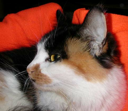

In [108]:
eg = tfds.as_dataframe(ds.take(1), info)
eg

In [113]:
eg = eg[['image', 'label']]

In [114]:
eg['image'] = eg['image'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))
eg['image'] = eg['image'].apply(lambda x: cv2.resize(x, (100, 100)))

<ipython-input-114-c5ac32b93493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg['image'] = eg['image'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))
<ipython-input-114-c5ac32b93493>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg['image'] = eg['image'].apply(lambda x: cv2.resize(x, (100, 100)))


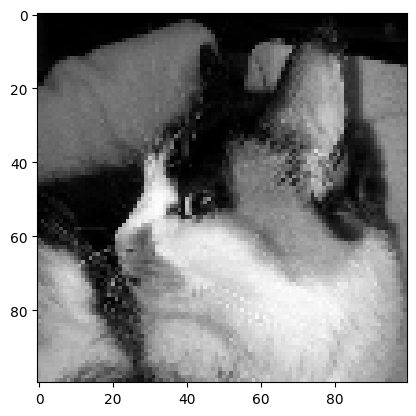

In [120]:
plt.imshow(eg.image[0], cmap = 'gray')

In [122]:
eg_x = []
for index, row in eg.iterrows():
    eg_x = row['image']

eg_x = np.array(eg_x).reshape(-1, img_size, img_size, 1)
eg_x

array([[[[  8],
         [  3],
         [  1],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  8],
         [  3],
         [  1],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  8],
         [  5],
         [  1],
         ...,
         [  1],
         [  2],
         [  2]],

        ...,

        [[148],
         [160],
         [160],
         ...,
         [114],
         [117],
         [117]],

        [[146],
         [157],
         [156],
         ...,
         [117],
         [117],
         [116]],

        [[154],
         [157],
         [156],
         ...,
         [115],
         [114],
         [121]]]], dtype=uint8)

In [126]:
predictions = model.predict(eg_x)

1/1 [==============================] - 0s 27ms/step


In [127]:
import numpy as np
print(f'model predicts: {np.argmax(predictions[0])}')

model predicts: 0
